<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary modules


In [77]:
import pandas as pd

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
import seaborn as sns
sns.set()

In [80]:
import numpy as np

In [81]:
from pandas.plotting import scatter_matrix

In [82]:
pip install mpl-finance

In [83]:
from mpl_finance import candlestick_ohlc

In [84]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [85]:
from statsmodels.tsa.arima_model import ARIMA

##Understanding Data

In [86]:
EURUSD=pd.read_csv('EURUSD_historical_data.csv',header=0,parse_dates=True)
EURJPY=pd.read_csv('EURJPY_historical_data.csv',header=0,parse_dates=True)
USDJPY=pd.read_csv('USDJPY_historical_data.csv',header=0,parse_dates=True)

In [165]:
EURUSD.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%),20,200,returns,forecast_data
0,2021-07-09 00:00:00,1.18466,1.18494,1.18449,NaN,0.7,0.01,NaN,NaN,NaN,NaN
1,2021-07-08 23:45:00,1.18471,1.18478,1.18459,-0.00010,-0.8,-0.01,NaN,NaN,-0.000084,NaN
2,2021-07-08 23:30:00,1.18438,1.18478,1.18436,0.00008,3.3,0.03,NaN,NaN,0.000068,NaN
3,2021-07-08 23:15:00,1.18422,1.18426,1.18406,-0.00045,0.4,0.00,NaN,NaN,-0.000380,NaN
4,2021-07-08 23:00:00,1.18454,1.18464,1.18415,-0.00002,-3.0,-0.03,NaN,NaN,-0.000017,NaN


In [88]:
EURJPY.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,07/09/2021 0:00,130.077,130.175,130.046,130.125,4.8,0.04
1,07/08/2021 23:45,130.112,130.130,130.050,130.077,-3.5,-0.03
2,07/08/2021 23:30,130.073,130.130,130.072,130.113,4.0,0.03
3,07/08/2021 23:15,130.050,130.058,130.035,130.047,-0.3,0.00
4,07/08/2021 23:00,130.040,130.063,130.033,130.051,1.1,0.01


In [89]:
EURJPY.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,130.889421,130.921003,130.850584,130.885623,-0.379740,-0.002779
std,0.623335,0.616694,0.633185,0.622749,4.750187,0.036412
min,129.698000,129.783000,129.625000,129.700000,-23.000000,-0.170000
25%,130.417000,130.455000,130.381000,130.415000,-3.000000,-0.020000
50%,130.809000,130.834000,130.772000,130.807000,0.000000,0.000000
75%,131.603000,131.622000,131.581000,131.603000,1.800000,0.010000
max,131.836000,131.863000,131.812000,131.837000,20.100000,0.150000


In [90]:
EURUSD.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,1.183648,1.183909,1.183360,1.183646,-0.013247,-0.000182
std,0.002671,0.002663,0.002687,0.002669,3.986214,0.033961
min,1.178480,1.178770,1.178150,1.178470,-17.800000,-0.150000
25%,1.181950,1.182170,1.181600,1.181980,-1.900000,-0.020000
50%,1.183840,1.184090,1.183610,1.183830,0.000000,0.000000
75%,1.186060,1.186390,1.185860,1.186080,2.100000,0.020000
max,1.189350,1.189540,1.189020,1.189390,16.400000,0.140000


In [91]:
USDJPY.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,110.580343,110.603561,110.553306,110.577013,-0.332987,-0.003039
std,0.406147,0.401732,0.412936,0.407037,3.696173,0.033694
min,109.569000,109.602000,109.535000,109.567000,-17.300000,-0.160000
25%,110.538000,110.562000,110.511000,110.532000,-2.000000,-0.020000
50%,110.654000,110.677000,110.633000,110.653000,-0.100000,0.000000
75%,110.850000,110.874000,110.833000,110.851000,1.600000,0.010000
max,111.165000,111.190000,111.151000,111.165000,12.400000,0.110000


In [92]:
EURJPY.columns,EURUSD.columns,USDJPY.columns

(Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object'),
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object'),
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change(Pips)', 'Change(%)'], dtype='object'))

In [93]:
EURJPY.shape,EURUSD.shape,USDJPY.shape

((385, 7), (385, 7), (385, 7))

In [94]:
EURJPY["Date"] = pd.to_datetime(EURJPY["Date"])

In [95]:
EURUSD['Date']=pd.to_datetime(EURUSD['Date'])
USDJPY['Date']=pd.to_datetime(USDJPY['Date'])
                              

In [96]:
EURJPY.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,2021-07-09 00:00:00,130.077,130.175,130.046,130.125,4.8,0.04
1,2021-07-08 23:45:00,130.112,130.130,130.050,130.077,-3.5,-0.03
2,2021-07-08 23:30:00,130.073,130.130,130.072,130.113,4.0,0.03
3,2021-07-08 23:15:00,130.050,130.058,130.035,130.047,-0.3,0.00
4,2021-07-08 23:00:00,130.040,130.063,130.033,130.051,1.1,0.01


##Plotting the columns

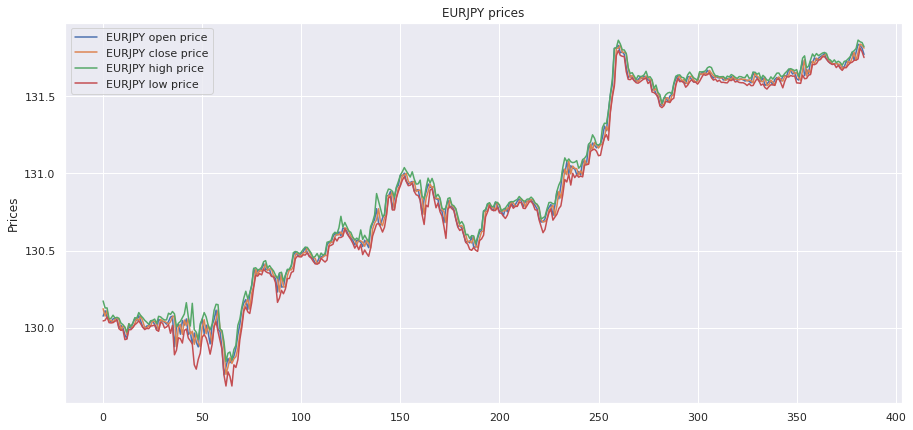

In [97]:
EURJPY['Open'].plot(label='EURJPY open price',figsize=(15,7))
EURJPY['Close'].plot(label='EURJPY close price',figsize=(15,7))
EURJPY['High'].plot(label='EURJPY high price',figsize=(15,7))
EURJPY['Low'].plot(label='EURJPY low price',figsize=(15,7))
plt.legend()
plt.ylabel('Prices')
plt.title('EURJPY prices')
plt.show()

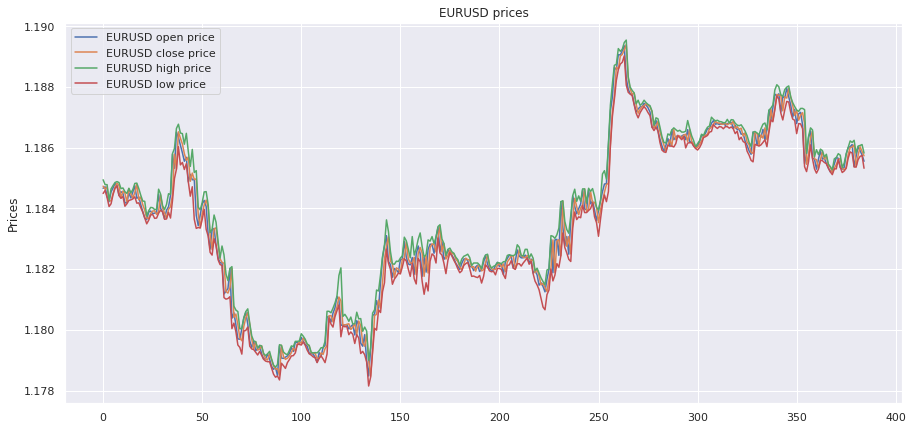

In [98]:
EURUSD['Open'].plot(label='EURUSD open price',figsize=(15,7))
EURUSD['Close'].plot(label='EURUSD close price',figsize=(15,7))
EURUSD['High'].plot(label='EURUSD high price',figsize=(15,7))
EURUSD['Low'].plot(label='EURUSD low price',figsize=(15,7))
plt.legend()
plt.ylabel('Prices')
plt.title('EURUSD prices')
plt.show()

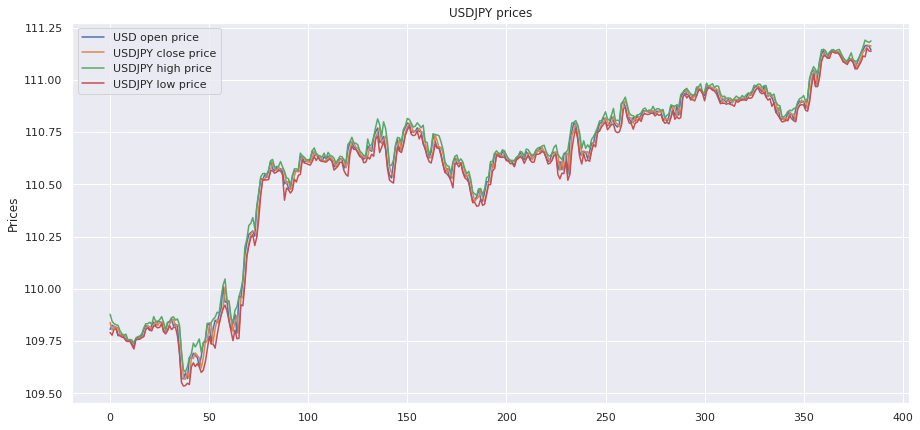

In [99]:
USDJPY['Open'].plot(label='USD open price',figsize=(15,7))
USDJPY['Close'].plot(label='USDJPY close price',figsize=(15,7))
USDJPY['High'].plot(label='USDJPY high price',figsize=(15,7))
USDJPY['Low'].plot(label='USDJPY low price',figsize=(15,7))
plt.legend()
plt.ylabel('Prices')
plt.title('USDJPY prices')
plt.show()

######Peak of Closing value is at 6th July for EURJPY

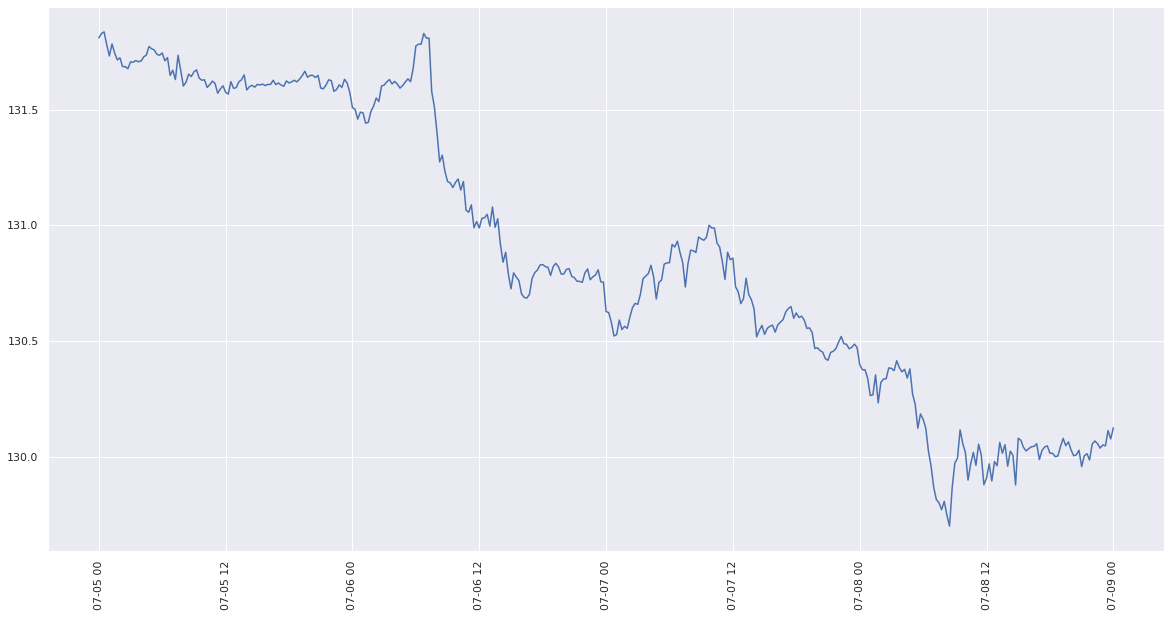

In [100]:
plt.figure(figsize=(20, 10))
plt.plot(EURJPY['Date'],EURJPY['Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

######Peak of Closing value is at 6th July for EURUSD

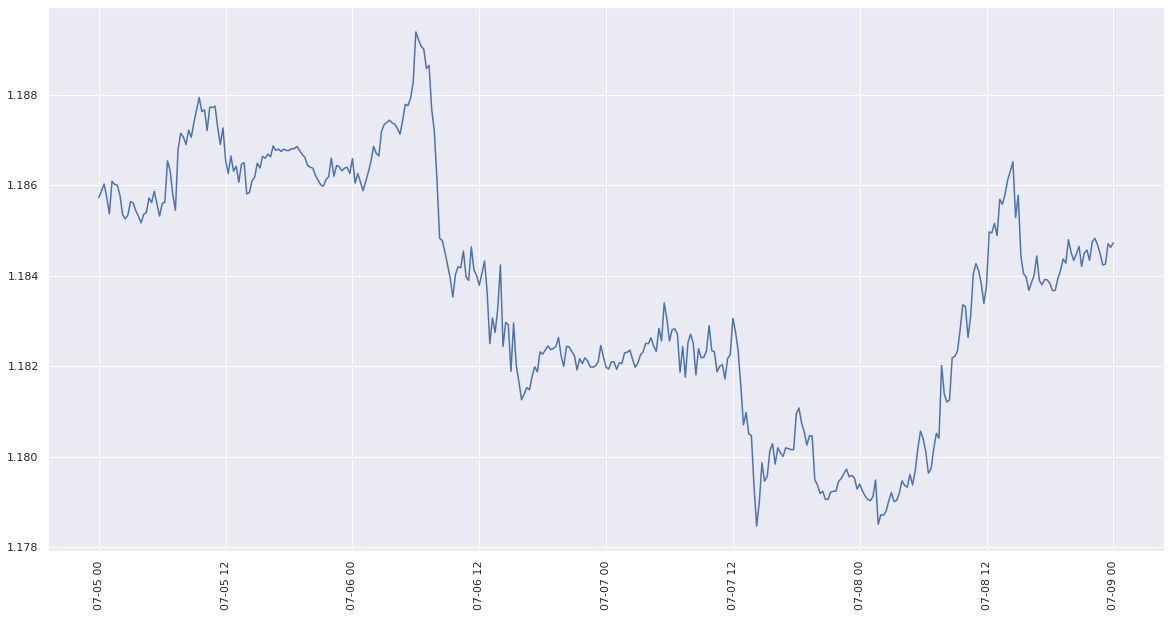

In [101]:
plt.figure(figsize=(20, 10))
plt.plot(EURUSD['Date'],EURUSD['Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

Peek of Closing value is at 5th July for USDJPY

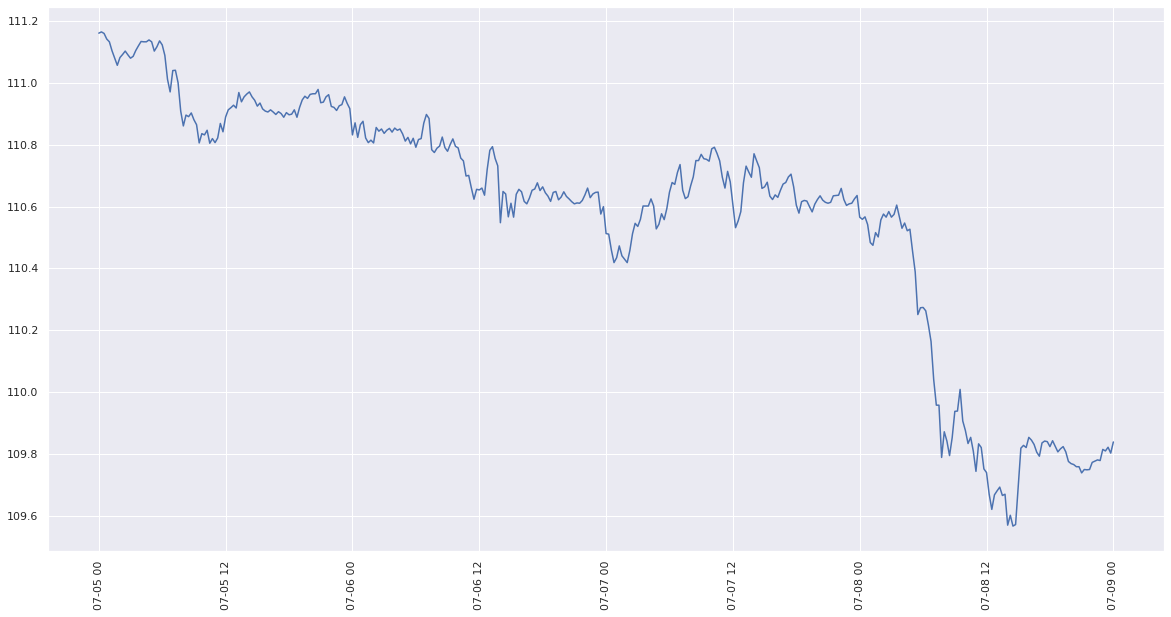

In [102]:
plt.figure(figsize=(20, 10))
plt.plot(USDJPY['Date'],USDJPY['Close'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

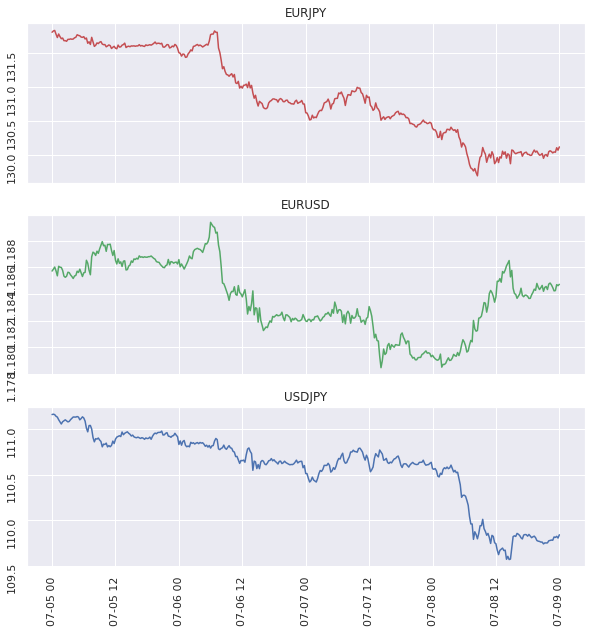

In [103]:
f,ax=plt.subplots(3,1,figsize=(10,10),sharex=True)
ax[0].plot(EURJPY['Date'],EURJPY['Close'],color='r')
ax[0].tick_params(labelrotation=90)
ax[0].grid(True)
ax[0].set_title('EURJPY');

ax[1].plot(EURUSD['Date'],EURUSD['Close'],color='g')
ax[1].tick_params(labelrotation=90)
ax[1].grid(True)
ax[1].set_title('EURUSD');

ax[2].plot(USDJPY['Date'],USDJPY['Close'],color='b')
ax[2].tick_params(labelrotation=90)
ax[2].grid(True)
ax[2].set_title('USDJPY');

In [104]:
EURUSD.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,2021-07-09 00:00:00,1.18466,1.18494,1.18449,1.18473,0.7,0.01
1,2021-07-08 23:45:00,1.18471,1.18478,1.18459,1.18463,-0.8,-0.01
2,2021-07-08 23:30:00,1.18438,1.18478,1.18436,1.18471,3.3,0.03
3,2021-07-08 23:15:00,1.18422,1.18426,1.18406,1.18426,0.4,0.00
4,2021-07-08 23:00:00,1.18454,1.18464,1.18415,1.18424,-3.0,-0.03


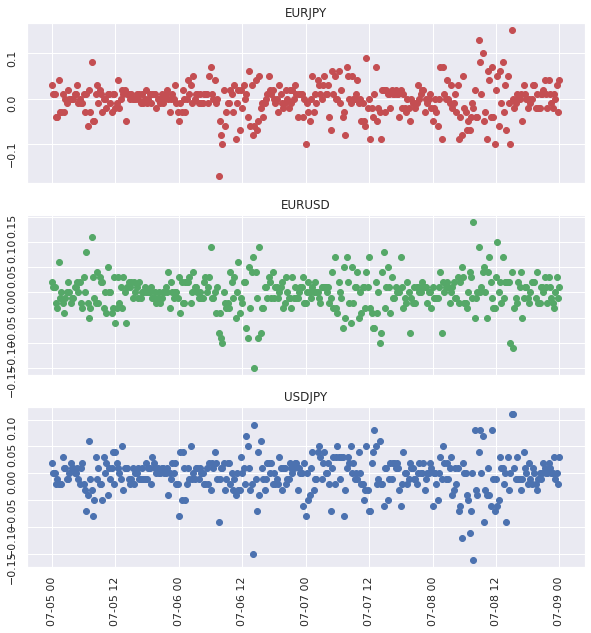

In [105]:
f,ax=plt.subplots(3,1,figsize=(10,10),sharex=True)
ax[0].scatter(EURJPY['Date'],EURJPY['Change(%)'],color='r')
ax[0].tick_params(labelrotation=90)
ax[0].grid(True)
ax[0].set_title('EURJPY');

ax[1].scatter(EURUSD['Date'],EURUSD['Change(%)'],color='g')
ax[1].tick_params(labelrotation=90)
ax[1].grid(True)
ax[1].set_title('EURUSD');

ax[2].scatter(USDJPY['Date'],USDJPY['Change(%)'],color='b')
ax[2].tick_params(labelrotation=90)
ax[2].grid(True)
ax[2].set_title('USDJPY');

In [106]:
eurjpy_close=EURJPY[['Close']]
eurusd_close=EURUSD[['Close']]
usdjpy_close=USDJPY[['Close']]

In [107]:
eurjpy_close_pct=eurjpy_close.pct_change()
eurusd_close_pct=eurusd_close.pct_change()
usdjpy_close_pct=usdjpy_close.pct_change()

In [108]:
eurjpy_close_pct.fillna(0,inplace=True)
eurusd_close_pct.fillna(0,inplace=True)
usdjpy_close_pct.fillna(0,inplace=True)

In [109]:
usdjpy_close_pct.head()

,Close
0,0.000000
1,-0.000328
2,0.000173
3,-0.000109
4,0.000046


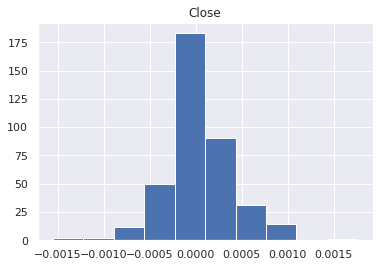

In [110]:
eurjpy_close_pct.hist()
plt.show();

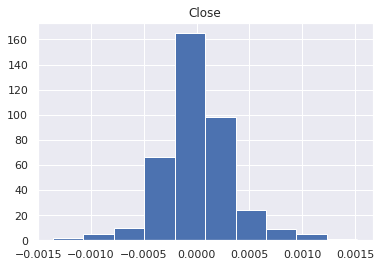

In [111]:
eurusd_close_pct.hist()
plt.show();

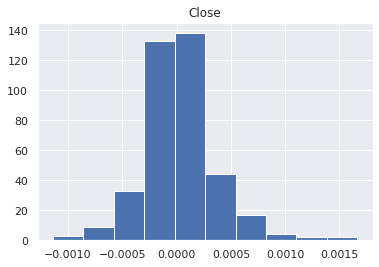

In [112]:
usdjpy_close_pct.hist()
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

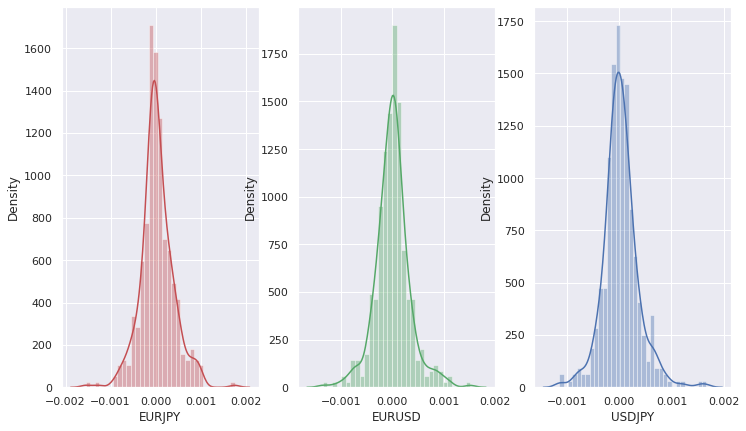

In [113]:
f,axes=plt.subplots(1,3,figsize=(12,7))
sns.distplot(eurjpy_close_pct['Close'],color='r',ax=axes[0],axlabel='EURJPY');
sns.distplot(eurusd_close_pct['Close'],color='g',ax=axes[1],axlabel='EURUSD');
sns.distplot(usdjpy_close_pct['Close'],color='b',ax=axes[2],axlabel='USDJPY');

##Correlations across the datasets 

In [114]:
combined=pd.concat([EURJPY['Close'],EURUSD['Close'],USDJPY['Close']],axis=1)
combined.columns=['EURJPY Close','EURUSD Close','USDJPY Close']

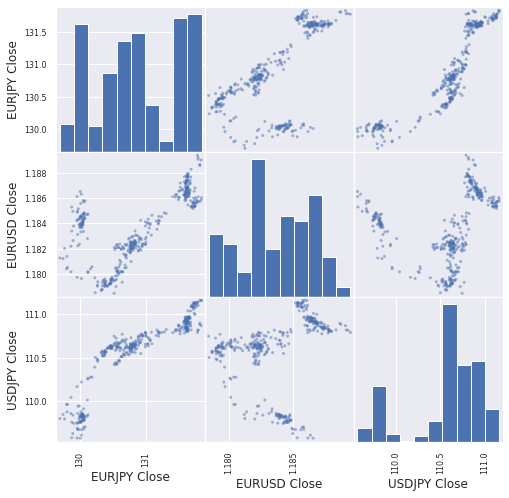

In [115]:
scatter_matrix(combined,figsize=(8,8));

###There is small correlation between USDJPY and EURJPY

##Rolling window analysis

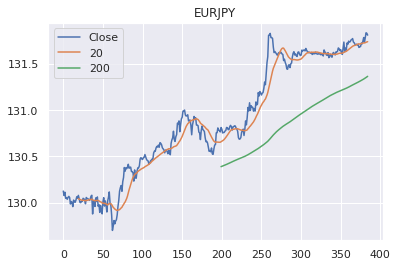

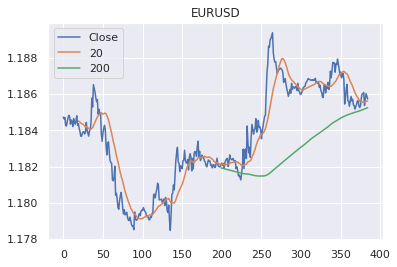

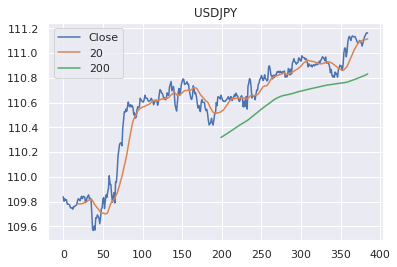

In [116]:
eurjpy_close_px=EURJPY['Close']
EURJPY['20']=eurjpy_close_px.rolling(window=20).mean()
EURJPY['200']=eurjpy_close_px.rolling(window=200).mean()
EURJPY[['Close','20','200']].plot(title='EURJPY')
plt.show()
eurusd_close_px=EURUSD['Close']
EURUSD['20']=eurusd_close_px.rolling(window=20).mean()
EURUSD['200']=eurusd_close_px.rolling(window=200).mean()
EURUSD[['Close','20','200']].plot(title='EURUSD')
plt.show()
usdjpy_close_px=USDJPY['Close']
USDJPY['20']=usdjpy_close_px.rolling(window=20).mean()
USDJPY['200']=usdjpy_close_px.rolling(window=200).mean()
USDJPY[['Close','20','200']].plot(title='USDJPY')
plt.show()

##Seasonal Decomposition

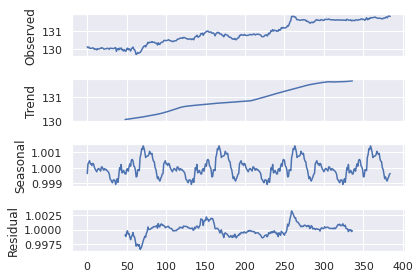

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
decompfreq = ((24*60)//15)

analysis_eurjpy = EURJPY[['Close']].copy()
analysis_eurjpy=analysis_eurjpy.dropna()
decompose_result_mult = seasonal_decompose(analysis_eurjpy, model="multiplicative",freq=decompfreq)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();



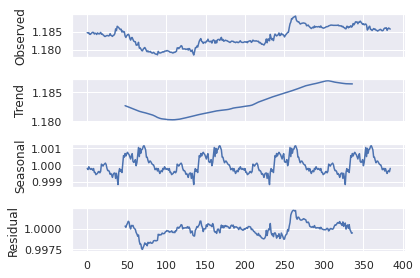

In [122]:
analysis_eurusd = EURUSD[['Close']].copy()
decompose_result_mult = seasonal_decompose(analysis_eurusd, model="multiplicative",freq=decompfreq)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();


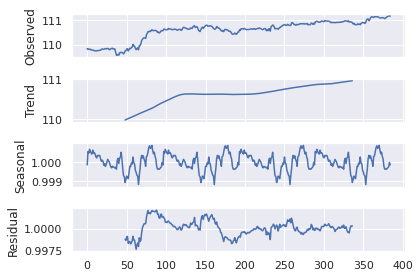

In [123]:
analysis_usdjpy = USDJPY[['Close']].copy()
decompose_result_mult = seasonal_decompose(analysis_usdjpy, model="multiplicative",freq=decompfreq)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();


##ARIMA model

In [124]:
from statsmodels.tsa.stattools import adfuller, kpss

In [125]:

test_result = adfuller(EURJPY['Close'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result,labels):
    print (label+': '+str(value))
if test_result[1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: -0.7314123399853385
p-value: 0.8384444137362415
No. of Lags Used: 3
Number of Observations Used: 381
Fail to reject H0 thereby data is non-stationary 


In [126]:
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("fail to reject H0 and data is non-stationary ")

In [127]:

EURJPY['Close'] = EURJPY['Close'] - EURJPY['Close']. shift (1)
check_adf(EURJPY['Close'].dropna())

ADF Test:
ADF Statistic: -9.863304549588825
p-value: 4.177341812334344e-17
No. of Lags Used: 2
Number of Observations Used: 381
Reject null hypothesis and data is stationary


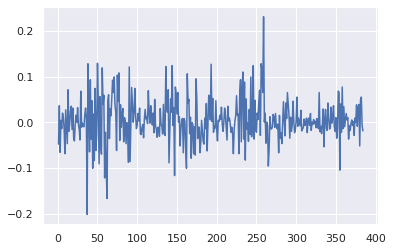

In [128]:
EURJPY['Close']. plot ()

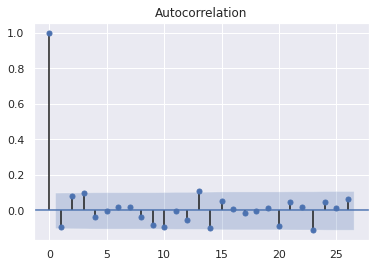

In [129]:
fig_eurjpy = plot_acf(EURJPY["Close"].dropna())

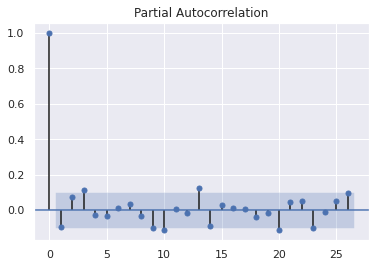

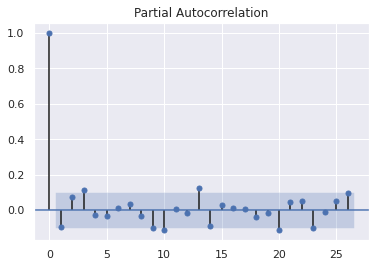

In [130]:
plot_pacf(EURJPY['Close'].dropna())

In [131]:

model_eurjpy = sm.tsa.statespace.SARIMAX(EURJPY['Close'],order=(2,1,7), seasonal_order=(1,1,1,12))
ARIMAresult = model_eurjpy.fit()
print (ARIMAresult.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                  385
Model:             SARIMAX(2, 1, 7)x(1, 1, 1, 12)   Log Likelihood                 569.722
Date:                            Mon, 19 Jul 2021   AIC                          -1115.445
Time:                                    06:22:12   BIC                          -1068.418
Sample:                                         0   HQIC                         -1096.769
                                            - 385                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4287      1.211     -1.180      0.238      -3.802       0.944
ar.L2         -0.6832      0.867   

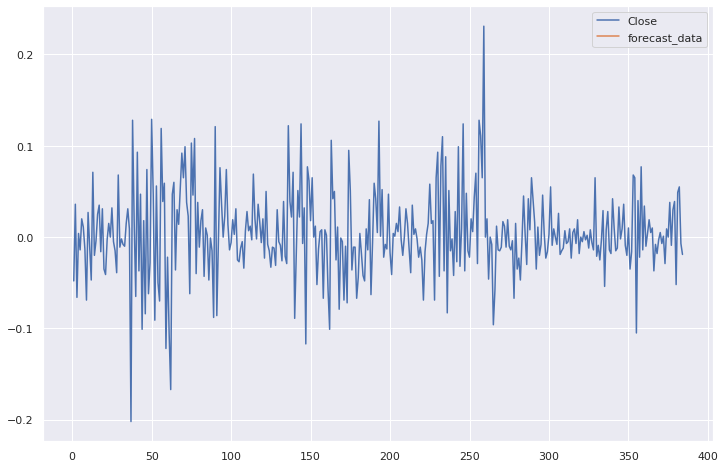

In [154]:
EURJPY['forecast_data'] = ARIMAresult.predict(start = 385, end= 400, dynamic= True)  
EURJPY[['Close','forecast_data']]. plot (figsize= (12,8))

In [133]:

test_result_eurusd = adfuller(EURUSD['Close'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result_eurusd,labels):
    print (label+': '+str(value))
if test_result[1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: -1.4701595167427899
p-value: 0.5482179898440805
No. of Lags Used: 5
Number of Observations Used: 379
Fail to reject H0 thereby data is non-stationary 


In [134]:
EURUSD['Close'] = EURUSD['Close'] - EURUSD['Close']. shift (1)
check_adf(EURUSD['Close'].dropna())

ADF Test:
ADF Statistic: -7.5820818174842275
p-value: 2.665435475982254e-11
No. of Lags Used: 4
Number of Observations Used: 379
Reject null hypothesis and data is stationary


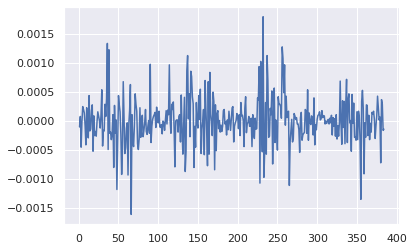

In [135]:
EURUSD['Close']. plot ()

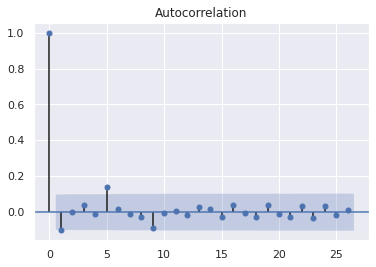

In [136]:
fig_eurusd = plot_acf(EURUSD["Close"].dropna())

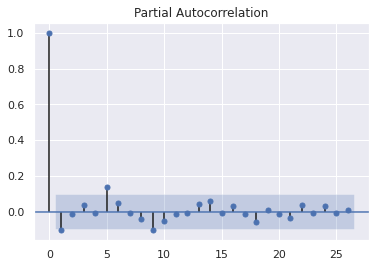

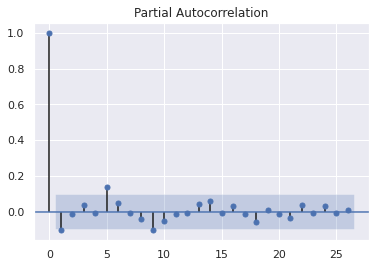

In [137]:
plot_pacf(EURUSD['Close'].dropna())

In [152]:
model_eurusd = sm.tsa.SARIMAX(EURUSD['Close'], trend='c', order=(2,1,2), enforce_stationarity=False, enforce_invertibility=False)

ARIMAresult_2 = model_eurusd.fit()
print (ARIMAresult_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                  385
Model:               SARIMAX(2, 1, 2)   Log Likelihood                2430.648
Date:                Mon, 19 Jul 2021   AIC                          -4849.297
Time:                        06:37:34   BIC                          -4825.640
Sample:                             0   HQIC                         -4839.911
                                - 385                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.223e-06   3.63e-06     -0.337      0.736   -8.33e-06    5.89e-06
ar.L1         -0.6130      0.026    -23.854      0.000      -0.663      -0.563
ar.L2         -0.0770      0.050     -1.549      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


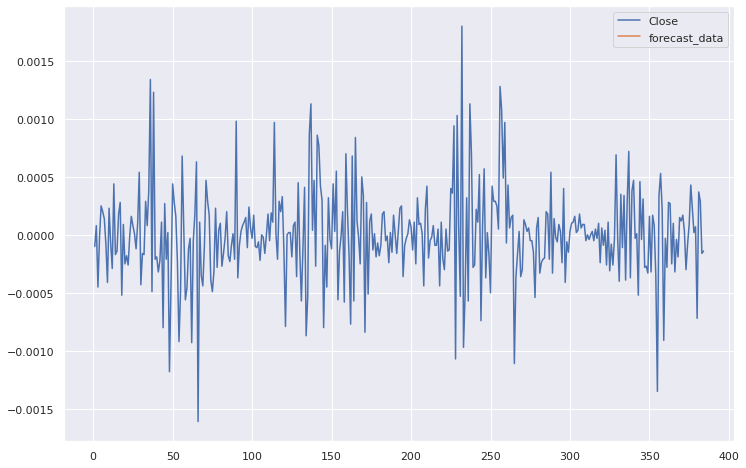

In [161]:
EURUSD['forecast_data'] = ARIMAresult_2.predict(start = 386, end=400, dynamic= True)  
EURUSD[['Close','forecast_data']]. plot (figsize= (12,8))

In [144]:

test_result_usdjpy = adfuller(USDJPY['Close'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result_usdjpy,labels):
    print (label+': '+str(value))
if test_result[1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: -1.242617601432815
p-value: 0.6549994301814808
No. of Lags Used: 0
Number of Observations Used: 384
Fail to reject H0 thereby data is non-stationary 


In [145]:
USDJPY['Close'] = USDJPY['Close'] - USDJPY['Close']. shift (1)
check_adf(USDJPY['Close'].dropna())

ADF Test:
ADF Statistic: -5.438928547289434
p-value: 2.804553071994243e-06
No. of Lags Used: 13
Number of Observations Used: 370
Reject null hypothesis and data is stationary


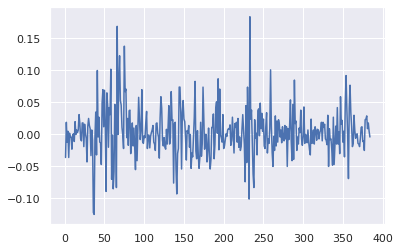

In [146]:
USDJPY['Close']. plot ()

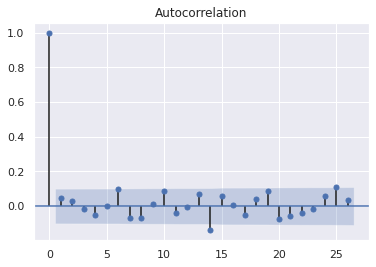

In [147]:
fig_usdjpy = plot_acf(USDJPY["Close"].dropna())

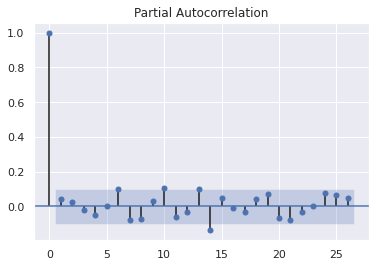

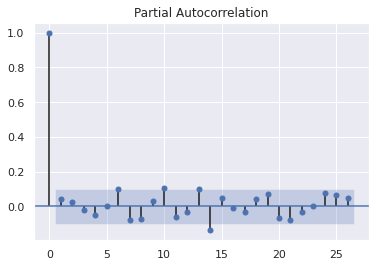

In [148]:
plot_pacf(USDJPY['Close'].dropna())

In [149]:
model_usdjpy = sm.tsa.statespace.SARIMAX(USDJPY['Close'],order=(1,1,1), seasonal_order=(1,1,1,12))
ARIMAresult_3 = model_usdjpy.fit()
print (ARIMAresult_3.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                  385
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 662.552
Date:                            Mon, 19 Jul 2021   AIC                          -1315.104
Time:                                    06:36:03   BIC                          -1295.509
Sample:                                         0   HQIC                         -1307.322
                                            - 385                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0402      0.043      0.940      0.347      -0.044       0.124
ma.L1         -0.9943      0.055   

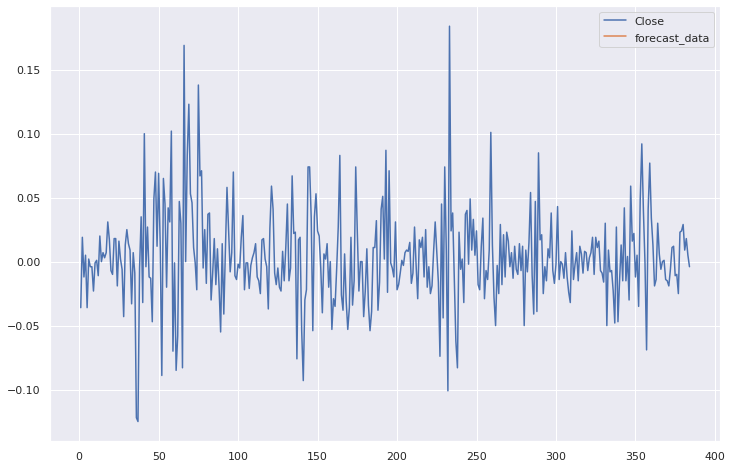

In [156]:
USDJPY['forecast_data'] = ARIMAresult_3.predict(start = 385, end= 400, dynamic= True)  
USDJPY[['Close','forecast_data']]. plot (figsize= (12,8))